<a href="https://colab.research.google.com/github/myllanes/Introduction-to-Deep-Learning/blob/main/HW2_VGGNET_CIFAR_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

VGG11(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): Dropout(p=0.3, inplace=False)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): Dropout(p=0.3, inplace=False)
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU()
    (13): Dropout(p=0.3, inplace=False)
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (16): ReLU()
    (17): Dropout(p=0.3, inplace=False)
    (18): Conv2d(512, 512, kernel_size=(3, 3), stri

100%|██████████| 169M/169M [00:15<00:00, 11.2MB/s]


Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1, Training loss: 4.605510925834787, Validation loss: 4.605275391770628, Validation Accuracy: 1.0%
Epoch 2, Training loss: 4.605520531830693, Validation loss: 4.605238740817427, Validation Accuracy: 1.0%
Epoch 3, Training loss: 4.605430341270286, Validation loss: 4.605212738719612, Validation Accuracy: 1.0%
Epoch 4, Training loss: 4.605399708372618, Validation loss: 4.605197847079926, Validation Accuracy: 1.0%
Epoch 5, Training loss: 4.605462847957989, Validation loss: 4.605186261308079, Validation Accuracy: 1.0%
Epoch 6, Training loss: 4.605372016428376, Validation loss: 4.60518041891031, Validation Accuracy: 1.0%
Epoch 7, Training loss: 4.605409010815758, Validation loss: 4.605176595072396, Validation Accuracy: 1.0%
Epoch 8, Training loss: 4.605398089932999, Validation loss: 4.605173874206056, Validation Accuracy: 1.0%
Epoch 9, Training loss: 4.6054294751534, Validation loss: 4.60517037181

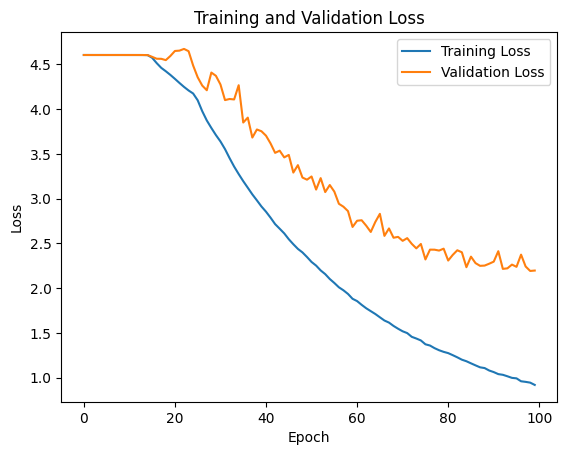

In [1]:
#Michael Yllanes
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Definition of VGG11
class VGG11(nn.Module):
    def __init__(self, num_classes=100):
        super(VGG11, self).__init__()
        self.features = nn.Sequential(
            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            #nn.Dropout(0.3),  # DROPOUT
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            #nn.Dropout(0.3),  # DROPOUT
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 3
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            #nn.Dropout(0.3),  # DROPOUT
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            #nn.Dropout(0.3),  # DROPOUT
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 4
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            #nn.Dropout(0.3),  # DROPOUT
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            #nn.Dropout(0.3),  # DROPOUT
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 5
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            #nn.Dropout(0.3),  # DROPOUT
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            #nn.Dropout(0.3),  # DROPOUT
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.classifier = nn.Sequential(
            nn.Linear(512 * 1 * 1, 4096),
            nn.ReLU(),
            #nn.Dropout(0.5), # DROPOUT
            nn.Linear(4096, 1024),
            nn.ReLU(),
            #nn.Dropout(0.5), # DROPOUT
            nn.Linear(1024, num_classes),  # Change num_classes to 100
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.classifier(x)
        return x


# Example of using the VGG11 model
model = VGG11(num_classes=100)  # 100 classes
print(model)


# Check if GPU is available and set the device accordingly
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Load and preprocess CIFAR-100 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR100(root='./data', train=True,  # CIFAR100
                                         download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR100(root='./data', train=False,  # CIFAR100
                                        download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

# Define the network, loss function, and optimizer
net = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Lists for storing loss values and validation accuracy
train_loss_list = []
val_loss_list = []
val_accuracy_list = []

# Training and validation loop
for epoch in range(100):  # loop over the dataset multiple times
    running_loss = 0.0
    net.train()  # Set the model to training mode
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss_list.append(running_loss / len(trainloader))

    # Validation loop
    running_loss = 0.0
    correct = 0
    total = 0
    net.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_loss_list.append(running_loss / len(testloader))
    val_accuracy = 100 * correct / total
    val_accuracy_list.append(val_accuracy)

    print(f'Epoch {epoch + 1}, Training loss: {train_loss_list[-1]}, Validation loss: {val_loss_list[-1]}, Validation Accuracy: {val_accuracy}%')

# Print final validation accuracy
print(f'Final Validation Accuracy: {val_accuracy_list[-1]}%')
# Calculate total number of parameters
total_params = sum(p.numel() for p in net.parameters())
print(f'Total number of parameters in the model: {total_params}')

# Plotting training and validation loss
plt.plot(train_loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()